In [1]:
#librerias
import numpy as np
import pandas as pd
import seaborn as sns

# Cargando datos

In [2]:
# carga de datos
data1 = pd.read_csv("./data/train_1.csv",sep=";",index_col=None,header=0)
data2 = pd.read_csv("./data/train_2.csv",sep=";",index_col=None,header=0)
salida = pd.read_csv("./data/train_3.csv",sep=";",index_col=None,header=0)

#uniendo la data
data = data1.merge(data2,how='inner',on=['NUMPERIODO', 'NUMCODCONTRATOBSCS', 'VCHTELEFONO'])
data = data.merge(salida,how='inner',on=['NUMPERIODO', 'NUMCODCONTRATOBSCS', 'VCHTELEFONO'])

In [11]:
df = data.copy()

In [12]:
columns_exec = []
columns_exec.append('NUMINGRESOTEORICO')
columns_exec.append('VCHFAMILIA_PLAN')
columns_exec.append('NUMPERIODO')
columns_exec.append('VCHTELEFONO')
columns_exec.append('ANT_CLIENTE')
columns_exec.append('FLG_RECARGA')
columns_exec.append('VCHPACKCHIP')
columns_exec.append('VCHRANGO_RENTA')


In [13]:
pd.DataFrame(df.dtypes[df.dtypes=='object'])

,0
VCHPACKCHIP,object
VCHRANGO_RENTA,object
VCHFAMILIA_PLAN,object


In [14]:
df['VCHPACKCHIP'].value_counts()

PACK    510
SIM     239
Name: VCHPACKCHIP, dtype: int64

In [15]:
# VCHPACKCHIP
dicc_VCHPACKCHIP = {'PACK':0,
                   'SIM':0}
df['VCHPACKCHIP'] = df['VCHPACKCHIP'].map(dicc_VCHPACKCHIP)

In [16]:
# VCHRANGO_RENTA
df_VCHRANGO_RENTA_dummies = pd.get_dummies(df['VCHRANGO_RENTA'],prefix='VCHRANGO_RENTA')

In [17]:
df = pd.concat([df,df_VCHRANGO_RENTA_dummies],axis=1)

In [18]:
df.head()

,NUMPERIODO,NUMCODCONTRATOBSCS,VCHTELEFONO,ANT_CLIENTE,NUMRENTABASICA,VCHPACKCHIP,NUMINGRESOTEORICO,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,...,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,FLG_RECARGA,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,201804,38172100,51982603192,7.645161,41.525398,0,41.5254,151,596,590.9832,...,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,201804,9028333,51983661925,45.903226,122.879997,0,92.3700,54,410,327.9664,...,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,201805,34979663,51942976545,11.612903,66.949203,0,NaN,792,587,512.2667,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
3,201805,13670934,51958993810,32.838710,41.525398,0,NaN,170,144,100.5000,...,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,201804,16547229,51934098463,28.387097,62.711899,0,62.7119,219,784,745.2162,...,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1


In [19]:
x_data = df.drop(columns=columns_exec)

In [20]:
x_data.head()

,NUMCODCONTRATOBSCS,NUMRENTABASICA,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,NUMMINENTRANTEOFFNET_2M,NUMMINSALIENTEONNET_2M,NUMMINENTRANTEONNET_2M,NUMTRAFICOFACEBOOK_2M,NUMTRAFICOWHATSAPP_2M,...,NUMKB_ADICIONAL,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,38172100,41.525398,151,596,590.9832,155.5999,5.0168,0.0000,52.437877,291.387089,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,9028333,122.879997,54,410,327.9664,14.1669,82.0336,39.8331,33.883530,106.631694,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,34979663,66.949203,792,587,512.2667,657.4498,74.7333,134.5502,106.086946,366.092574,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,13670934,41.525398,170,144,100.5000,122.3668,43.5000,47.6332,47.410069,739.959649,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,16547229,62.711899,219,784,745.2162,193.3838,38.7838,25.6162,237.011286,1114.929423,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [21]:
y_data = df['FLG_RECARGA']

In [22]:
from sklearn.cross_validation import train_test_split

C:\Users\miguel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,train_size=0.65,random_state=50)

In [24]:
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

# Scaling

In [25]:
X_train.head()

,NUMCODCONTRATOBSCS,NUMRENTABASICA,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,NUMMINENTRANTEOFFNET_2M,NUMMINSALIENTEONNET_2M,NUMMINENTRANTEONNET_2M,NUMTRAFICOFACEBOOK_2M,NUMTRAFICOWHATSAPP_2M,...,NUMKB_ADICIONAL,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,11538633,66.949203,512,705,420.0667,267.8005,284.9333,244.1995,42.972771,76.336844,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,10051904,109.321999,347,587,395.9825,229.9501,191.0175,117.0499,52.954968,1046.706100,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,25077292,62.711899,185,173,96.9832,25.4501,76.0168,159.5499,11.346016,17.900717,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,30858312,66.949203,269,526,272.7163,187.0336,253.2837,81.9664,7.147714,48.908687,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,36974733,41.525398,13,16,12.8500,11.6334,3.1500,1.3666,16.388098,3402.328921,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_train_scaler = scaler.transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns)
X_train_scaler.head(3)

,NUMCODCONTRATOBSCS,NUMRENTABASICA,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,NUMMINENTRANTEOFFNET_2M,NUMMINSALIENTEONNET_2M,NUMMINENTRANTEONNET_2M,NUMTRAFICOFACEBOOK_2M,NUMTRAFICOWHATSAPP_2M,...,NUMKB_ADICIONAL,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,-1.408671,0.098087,0.435142,0.518477,0.333913,0.237923,0.491938,0.433751,-0.270907,-0.590015,...,-0.492917,0.0,-0.333305,-0.34785,-0.372911,-0.363294,-0.361065,-0.242536,-0.703836,0.794275
1,-1.540446,1.849302,-0.074342,0.230251,0.251391,0.049064,0.089417,-0.158484,-0.253968,0.311830,...,-0.492917,0.0,-0.333305,-0.34785,-0.372911,-0.363294,-0.361065,4.123106,-0.703836,-1.259010
2,-0.208683,-0.077036,-0.574562,-0.780979,-0.773097,-0.971313,-0.403473,0.039472,-0.324576,-0.644324,...,-0.492917,0.0,-0.333305,-0.34785,-0.372911,-0.363294,-0.361065,-0.242536,-0.703836,0.794275


In [28]:
X_test_scaler = scaler.transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test.columns)
X_test_scaler.head(3)

,NUMCODCONTRATOBSCS,NUMRENTABASICA,NUMMINUTOSENTRANTE_2M,NUMMINUTOSALIENTE_2M,NUMMINSALIENTEOFFNET_2M,NUMMINENTRANTEOFFNET_2M,NUMMINSALIENTEONNET_2M,NUMMINENTRANTEONNET_2M,NUMTRAFICOFACEBOOK_2M,NUMTRAFICOWHATSAPP_2M,...,NUMKB_ADICIONAL,PCT_MB_ADICIONAL,PCT_USO_TRAFICOTOTAL_2M,PCT_USO_TRAFICOTOTAL_1M,PCT_USO_TRAFICOTOTAL_M0,PCT_USO_TRAFICOTOTAL_U3M,PCT_USO_TRAFICOTOTAL_U2M,VCHRANGO_RENTA_Alta,VCHRANGO_RENTA_Baja,VCHRANGO_RENTA_Media
0,-1.617386,-0.952648,-0.710424,-0.062859,-0.198662,-0.465947,0.138059,-0.637228,-0.340991,-0.657123,...,-0.492917,0.0,-0.333305,-0.34785,-0.372911,-0.363294,-0.361065,-0.242536,1.420786,-1.259010
1,0.893504,1.148817,-0.478841,-0.680833,-0.523370,-0.153929,-0.540125,-0.579162,-0.272753,-0.544398,...,-0.492917,0.0,-0.333305,-0.34785,-0.372911,-0.363294,-0.361065,-0.242536,-0.703836,0.794275
2,0.661753,0.448327,0.095486,-0.026220,-0.638096,0.398251,0.752026,-0.228271,-0.323279,-0.573337,...,-0.492917,0.0,-0.333305,-0.34785,-0.372911,-0.363294,-0.361065,-0.242536,-0.703836,0.794275


In [29]:
X_train = X_train_scaler.copy()
X_test = X_test_scaler.copy()

In [30]:
print(X_train.shape)
print(X_test.shape)

(486, 352)
(263, 352)


## Modelamiento

In [31]:
def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf)

In [32]:
################################## CURVA ROC ###############################
def graficar_roc(y_test,y_pred_proba):
    import matplotlib.pyplot as plt
    from sklearn import metrics as mt
    from sklearn.cross_validation import train_test_split

    fpr, tpr, thresholds  = mt.roc_curve(y_test.astype('int'),y_pred_proba[:,1], pos_label = 1)

    roc_auc = mt.auc(fpr, tpr)

    print ('ROC AUC: %0.4f' % roc_auc)
    gini_print = (2*roc_auc - 1)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f) \nGini (2*roc_auc - 1) = %0.4f' %(roc_auc,gini_print))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [33]:
# modelo
from sklearn.linear_model import LogisticRegression

In [34]:
# Crear objeto modelo (Instanciar)
model_regl = LogisticRegression()

In [35]:
# Entrenar (ajustar) el modelo:
model = model_regl.fit(X_train,y_train)

In [36]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

In [37]:
from sklearn import metrics as mt

In [38]:
# Sobre el Training Data
print("Metricas del Training...")

Metricas del Training...


In [39]:
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0     211      21
Real_1      36     218


In [40]:
accuracy_train = mt.accuracy_score(y_train,pred_train)
print("Accuracy - Train:", accuracy_train) # 0.8775055679287305

Accuracy - Train: 0.8827160493827161


In [41]:
print(mt.classification_report(y_train,pred_train,digits = 3))

             precision    recall  f1-score   support

          0      0.854     0.909     0.881       232
          1      0.912     0.858     0.884       254

avg / total      0.885     0.883     0.883       486



ROC AUC: 0.9484


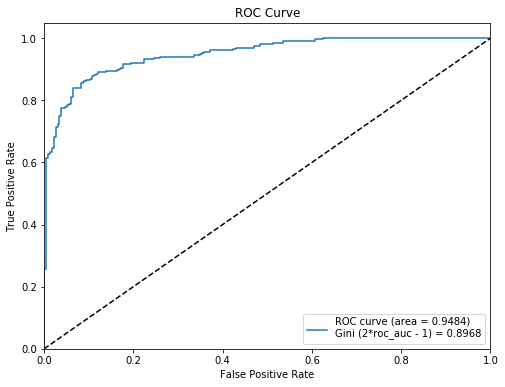

In [42]:
graficar_roc(y_train,pred_proba_train) # 0.9534

In [43]:
# Sobre el testing Data
print("Metricas del testing...")

Metricas del testing...


In [44]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0     110      23
Real_1      27     103


In [45]:
accuracy_test = mt.accuracy_score(y_test,pred_test)
print("Accuracy - test:", accuracy_test) # 0.8233333333333334

Accuracy - test: 0.8098859315589354


In [46]:
print(mt.classification_report(y_test,pred_test,digits = 3))

             precision    recall  f1-score   support

          0      0.803     0.827     0.815       133
          1      0.817     0.792     0.805       130

avg / total      0.810     0.810     0.810       263



ROC AUC: 0.8805


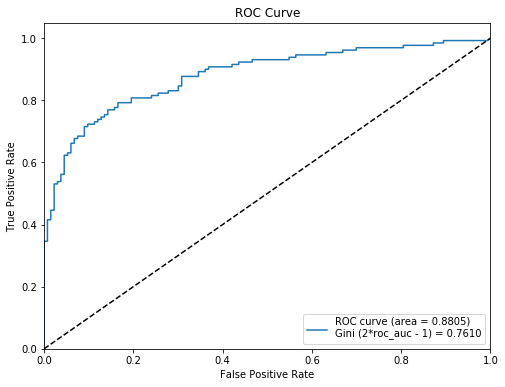

In [47]:
graficar_roc(y_test,pred_proba_test) # 0.8731

## Cross_Validation

In [48]:
X_train_cv = X_train.copy()
y_train_cv = y_train.copy()

In [56]:
# Instanciar Modelo Base:
#from sklearn.ensemble import RandomForestClassifier
#model_rf = RandomForestClassifier(max_depth=5, n_estimators= 50, 
#                                  random_state=100, max_features = 5)

In [50]:
# croos Validation
from sklearn.base import clone
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
k=5 #n_folds
metric = 'roc_auc'

cv = cross_validation.KFold(len(X_train_cv), n_folds=k, random_state = 123, shuffle = True)

results_train = []
results_test = []
list_models = [] 

In [57]:
i = 1
for traincv, testcv in cv:
    model = clone(model_regl)
    # Entrenar el modelo
    model = model.fit(X_train_cv.values[traincv], y_train_cv[traincv])
    # Calcular probabilidades
    probas_train = model.predict_proba(X_train_cv.values[traincv])[:,1]
    probas_test = model.predict_proba(X_train_cv.values[testcv])[:,1]
    # Calcular indicadores
    metric_train = roc_auc_score(y_train_cv[traincv],probas_train)
    metric_test = roc_auc_score(y_train_cv[testcv],probas_test)
    # Almacenar metricas y modelos
    results_train.append(metric_train)
    results_test.append(metric_test)
    list_models.append(model)
    
    print("Ok - ",str(i),": ", str(round(metric_train,6)), str(round(metric_test,6)))
    print("Mean Target: ", str(round(y_train_cv[traincv].mean(),4)), str(round(y_train_cv[testcv].mean(),4)))

    i = i + 1

result_final_train = np.mean(results_train)
result_final_test = np.mean(results_test)

print("CV roc - train :",result_final_train)
print("CV roc - test  :",result_final_test)

Ok -  1 :  0.957401 0.802917
Mean Target:  0.5258 0.5102
Ok -  2 :  0.957577 0.828139
Mean Target:  0.5116 0.567
Ok -  3 :  0.953932 0.847561
Mean Target:  0.5476 0.4227
Ok -  4 :  0.956089 0.879369
Mean Target:  0.5219 0.5258
Ok -  5 :  0.961294 0.847807
Mean Target:  0.5064 0.5876
CV roc - train : 0.9651309021807393
CV roc - test  : 0.8474538819939733


#### Calcular las predicciones sobre el X_test ..

In [58]:
df_probas_subm = pd.DataFrame()
i = 1
for model in list_models:
    probas_tmp = model.predict_proba(X_test)[:,1]
    df_probas_subm["model"+str(i)] = probas_tmp
    i += 1

In [59]:
df_probas_subm.head()

,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10
0,0.178049,0.194438,0.244303,0.240641,0.210829,0.145683,0.084066,0.124738,0.055598,0.103355
1,0.832004,0.799697,0.835573,0.820536,0.852561,0.898222,0.955370,0.997824,0.966371,0.962698
2,0.798280,0.759228,0.847417,0.781197,0.765862,1.000000,1.000000,0.999999,1.000000,1.000000
3,0.621694,0.490894,0.587926,0.557211,0.577049,0.726207,0.697651,0.643441,0.725521,0.484945
4,0.836806,0.896690,0.897972,0.901659,0.884442,0.992597,0.999049,0.999450,0.998875,0.999576


In [60]:
y_probas_subm = df_probas_subm.apply(np.mean, axis = 1)
y_probas_subm

0      0.158170
1      0.892085
2      0.895198
3      0.611254
4      0.940712
5      0.302772
6      0.221181
7      0.271074
8      0.864715
9      0.215071
10     0.227647
11     0.933582
12     0.365050
13     0.551777
14     0.129100
15     0.928905
16     0.271700
17     0.468867
18     0.174743
19     0.882918
20     0.924646
21     0.716084
22     0.955997
23     0.390532
24     0.938111
25     0.432216
26     0.591382
27     0.903328
28     0.701677
29     0.290628
         ...   
233    0.886018
234    0.649578
235    0.505899
236    0.507158
237    0.857066
238    0.237380
239    0.490213
240    0.928053
241    0.290750
242    0.850751
243    0.510913
244    0.376184
245    0.094886
246    0.876698
247    0.337989
248    0.691263
249    0.246734
250    0.424180
251    0.135532
252    0.589556
253    0.915400
254    0.886338
255    0.862438
256    0.153505
257    0.660863
258    0.960527
259    0.528779
260    0.210430
261    0.474063
262    0.268797
Length: 263, dtype: floa

In [61]:
roc_auc_score(y_test,y_probas_subm)

0.8949681897050319